<a href="https://colab.research.google.com/github/kanhaia21/Assignments/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theoretical

In [1]:
content="""
1. What is a Support Vector Machine (SVM)?
•	SVM is a supervised learning algorithm used for classification and regression.
•	It works by finding the hyperplane that best separates classes in feature space, maximizing the margin between the classes.

2. Difference between Hard Margin and Soft Margin SVM:

Hard Margin SVM- Finds a hyperplane that perfectly separates data; no misclassification allowed.
Soft Margin SVM- Allows some misclassification to improve generalization; controlled by C parameter.

3. Mathematical intuition behind SVM:
-Maximize the margin → better generalization.
-Only support vectors (closest points) matter.
-Kernels allow handling non-linear boundaries.
-Soft margin allows some errors to improve robustness.


4. Role of Lagrange Multipliers in SVM:
•	Convert the constrained optimization problem to a Lagrangian formulation.
•	Helps in solving the problem efficiently and enables kernel trick for non-linear separation.

5. What are Support Vectors in SVM?
•	Data points that lie on the margin or violate it.
•	They are critical points that define the optimal hyperplane.

6. What is a Support Vector Classifier (SVC)?
•	SVC is the classification version of SVM, used to predict discrete class labels.
•	Can use linear or non-linear kernels.

7. What is a Support Vector Regressor (SVR)?
•	SVR is the regression counterpart of SVM.
•	It predicts a continuous value and uses an epsilon-insensitive loss function.

8. What is the Kernel Trick in SVM?
•	A technique to map input data into higher dimensions without explicitly computing the transformation.
•	Allows SVM to solve non-linear problems efficiently.

9. Compare Linear, Polynomial, and RBF Kernels:
Linear-Linearly separable data; simple and fast
Polynomial-Captures polynomial relationships; degree parameter
RBF (Gaussian)- Non-linear separation; maps to infinite-dimensional space

10. Effect of the C parameter in SVM:
•	C controls the trade-off between margin size and classification error.
o	Large C → small margin, fewer misclassifications (may overfit)
o	Small C → larger margin, allows more misclassifications (better generalization)

11. Role of Gamma parameter in RBF Kernel SVM:
•	Defines influence of a single training point.
o	High gamma → close points have high influence (overfitting risk)
o	Low gamma → points influence farther regions (underfitting risk)

12. What is the Naive Bayes classifier, and why is it called "Naïve"?
•	A probabilistic classifier based on Bayes' theorem.
•	Called naive because it assumes features are independent, which is rarely true in practice.

13. What is Bayes’ Theorem?
Bayes’ Theorem describes the probability of an event 𝐴 given that another event 𝐵 has occurred, in terms of the reverse probability:
P(A∣B)=P(B∣A)⋅P(A)​/P(B)

Where
P(A∣B)- posterior probability (probability of event A given event B)
P(B∣A)- likelihood (probability of event B given event A)
P(A)- prior probability (probability of event A)
P(B)- marginal probability (probability of event B)


14. Differences between Gaussian, Multinomial, and Bernoulli Naive Bayes:
Gaussian NB- Continuous- Assumes features follow a Gaussian distribution
Multinomial NB- Discrete counts- Used for word counts in text classification
Bernoulli NB- Binary features- Used for binary/boolean features

15. When to use Gaussian Naive Bayes?
•	When features are continuous and roughly follow a normal distribution.

16. Key assumptions in Naive Bayes:
•	Feature independence given the class label
•	Feature distribution matches the chosen NB variant (Gaussian, Multinomial, Bernoulli)

17. Advantages and disadvantages:
Advantages:
•	Simple, fast, works well for high-dimensional data
•	Handles both continuous and discrete data (with variants)
Disadvantages:
•	Assumes feature independence (rarely true)
•	Performs poorly if features are highly correlated

18. Why is Naive Bayes good for text classification?
•	Works well with word frequencies (high-dimensional, sparse data)
•	Independence assumption roughly holds for bag-of-words models

19. Compare SVM and Naive Bayes:
SVM
Model type- Discriminative
Handles correlated features- Sensitive
Speed- Slower for large datasets
Accuracy- Often higher on small, clean data

Naive Bayes
Model type- Generative
Handles correlated features- Assumes independence
Speed- Very fast
Accuracy- Good for high-dimensional text

20. How does Laplace Smoothing help in Naive Bayes?
•	Prevents zero probability problem when a class has unseen features in training data.
"""
print(content)





1. What is a Support Vector Machine (SVM)?
•	SVM is a supervised learning algorithm used for classification and regression.
•	It works by finding the hyperplane that best separates classes in feature space, maximizing the margin between the classes.

2. Difference between Hard Margin and Soft Margin SVM:

Hard Margin SVM- Finds a hyperplane that perfectly separates data; no misclassification allowed.
Soft Margin SVM- Allows some misclassification to improve generalization; controlled by C parameter.

3. Mathematical intuition behind SVM:
-Maximize the margin → better generalization.
-Only support vectors (closest points) matter.
-Kernels allow handling non-linear boundaries.
-Soft margin allows some errors to improve robustness.


4. Role of Lagrange Multipliers in SVM:
•	Convert the constrained optimization problem to a Lagrangian formulation.
•	Helps in solving the problem efficiently and enables kernel trick for non-linear separation.

5. What are Support Vectors in SVM?
•	Data poi

#Practical

In [2]:
#21. Train an SVM Classifier on the Iris dataset and evaluate accuracy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [3]:
#22. Train SVM Classifiers with Linear and RBF kernels on Wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
kernels = ['linear', 'rbf']
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"{kernel} kernel accuracy: {acc:.4f}")


linear kernel accuracy: 0.9815
rbf kernel accuracy: 0.7593


In [6]:
#23. Train an SVM Regressor (SVR) on a housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict and evaluate
y_pred = svr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.3470583403432333


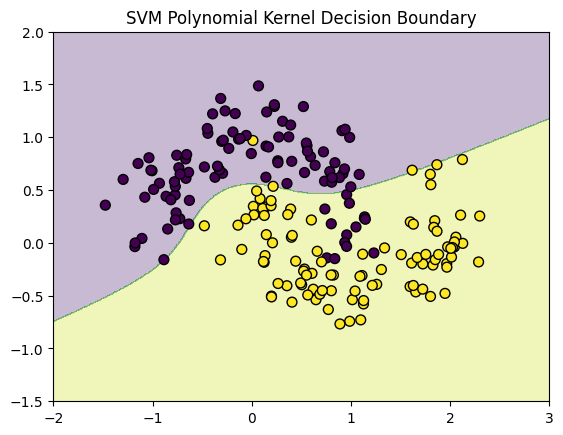

In [7]:
#24. SVM Classifier with Polynomial Kernel and visualize decision boundary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

clf = SVC(kernel='poly', degree=3)
clf.fit(X, y)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1.5, 2, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, s=50, edgecolors='k')
plt.title("SVM Polynomial Kernel Decision Boundary")
plt.show()


In [8]:
#25. Gaussian Naïve Bayes on Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9415204678362573


In [9]:
#26. Multinomial Naïve Bayes for 20 Newsgroups text classification
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

categories = ['comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(newsgroups.data)
y_train = newsgroups.target

# Test set
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
X_test = vectorizer.transform(newsgroups_test.data)
y_test = newsgroups_test.target

clf = MultinomialNB()
clf.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))


Accuracy: 0.966794380587484


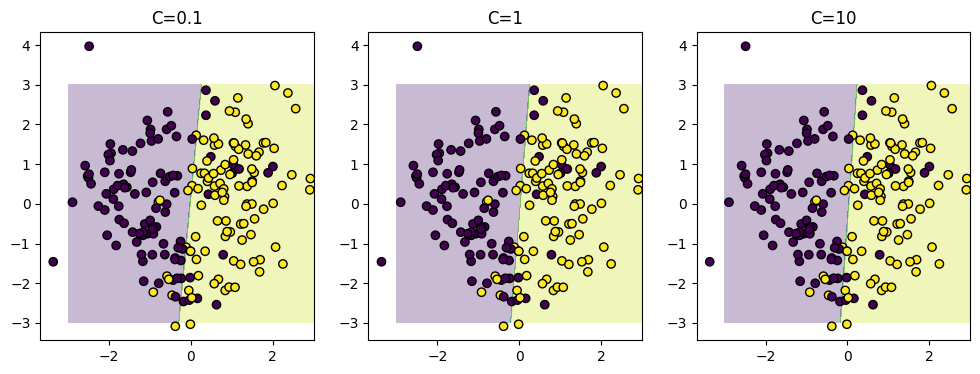

In [10]:
#27. SVM Classifier with different C values (visual comparison)
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, random_state=42)
C_values = [0.1, 1, 10]

plt.figure(figsize=(12,4))
for i, C in enumerate(C_values):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)

    xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot(1,3,i+1)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    plt.title(f"C={C}")
plt.show()


In [11]:
#28. Bernoulli Naïve Bayes for binary features
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=10, n_informative=5, n_redundant=0, n_classes=2, random_state=42)
X = (X > 0).astype(int)  # convert to binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, bnb.predict(X_test)))


Accuracy: 0.6166666666666667


In [14]:
#29. Feature scaling before SVM training
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Fit scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # use the same scaler

# Train SVC
clf_unscaled = SVC()
clf_unscaled.fit(X_train, y_train)

clf_scaled = SVC()
clf_scaled.fit(X_train_scaled, y_train)

# Evaluate
print("Unscaled Accuracy:", accuracy_score(y_test, clf_unscaled.predict(X_test)))
print("Scaled Accuracy:", accuracy_score(y_test, clf_scaled.predict(X_test_scaled)))



Unscaled Accuracy: 0.75
Scaled Accuracy: 0.75


In [15]:
#30. Gaussian NB with and without Laplace smoothing
gnb_no_smoothing = GaussianNB(var_smoothing=1e-9)
gnb_smoothing = GaussianNB(var_smoothing=1e-1)

gnb_no_smoothing.fit(X_train, y_train)
gnb_smoothing.fit(X_train, y_train)

print("No smoothing accuracy:", accuracy_score(y_test, gnb_no_smoothing.predict(X_test)))
print("With smoothing accuracy:", accuracy_score(y_test, gnb_smoothing.predict(X_test)))


No smoothing accuracy: 0.6
With smoothing accuracy: 0.6166666666666667


In [16]:
#31. SVM with GridSearchCV hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10], 'gamma':[0.01,0.1,1], 'kernel':['rbf','linear']}
grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Best params: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best accuracy: 0.7365094048720321


In [18]:
#32. SVM on imbalanced dataset with class weighting
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Corrected dataset
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,  # all features are informative
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    weights=[0.9, 0.1],  # imbalanced
    flip_y=0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM without and with class weighting
clf_no_weight = SVC()
clf_weight = SVC(class_weight='balanced')

clf_no_weight.fit(X_train, y_train)
clf_weight.fit(X_train, y_train)

print("Accuracy without weighting:", accuracy_score(y_test, clf_no_weight.predict(X_test)))
print("Accuracy with weighting:", accuracy_score(y_test, clf_weight.predict(X_test)))



Accuracy without weighting: 0.9266666666666666
Accuracy with weighting: 0.8666666666666667


In [19]:
#33. Naïve Bayes for spam detection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

emails = ["Free money", "Hi, how are you?", "Win a prize now", "Meeting at 10 am"]
labels = [1,0,1,0]  # 1=spam, 0=not spam

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

clf = MultinomialNB()
clf.fit(X, labels)
print(clf.predict(vectorizer.transform(["Free prize"])))


[1]


In [20]:
#34. Compare SVM and Naïve Bayes
clf_svm = SVC()
clf_nb = GaussianNB()

clf_svm.fit(X_train, y_train)
clf_nb.fit(X_train, y_train)

print("SVM Accuracy:", accuracy_score(y_test, clf_svm.predict(X_test)))
print("NB Accuracy:", accuracy_score(y_test, clf_nb.predict(X_test)))


SVM Accuracy: 0.9266666666666666
NB Accuracy: 0.9133333333333333


In [21]:
#35. Feature selection before Naïve Bayes
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

clf = GaussianNB()
clf.fit(X_new, y_train)
print("Accuracy with feature selection:", accuracy_score(y_test, clf.predict(X_test_new)))


Accuracy with feature selection: 0.9133333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=5 is greater than n_features=2. All the features will be returned.
  warnings.warn(


In [22]:
#36. SVM OvR vs OvO on Wine dataset
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

clf_ovr = OneVsRestClassifier(SVC(kernel='linear'))
clf_ovo = OneVsOneClassifier(SVC(kernel='linear'))

clf_ovr.fit(X_train, y_train)
clf_ovo.fit(X_train, y_train)

print("OvR Accuracy:", accuracy_score(y_test, clf_ovr.predict(X_test)))
print("OvO Accuracy:", accuracy_score(y_test, clf_ovo.predict(X_test)))


OvR Accuracy: 0.9266666666666666
OvO Accuracy: 0.9266666666666666


In [23]:
#37. SVM with Linear, Polynomial, RBF kernels on Breast Cancer dataset
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    print(f"{kernel} kernel accuracy:", accuracy_score(y_test, clf.predict(X_test)))


linear kernel accuracy: 0.9266666666666666
poly kernel accuracy: 0.9333333333333333
rbf kernel accuracy: 0.9266666666666666
